# Investigating the Impact of Moon Phases on Price Charts 🌕🌑



In this notebook, I will explore whether moon phases influence price movements.  
**Hypothesis:**  
- During the waxing moon, prices tend to rise.  
- During the waning moon, prices tend to fall.

I will use Python and statistical analysis to test this hypothesis.

In [204]:
import yfinance as yf

In [205]:
# ดึงข้อมูลราคาหุ้น SET Index ย้อนหลัง 15 ปี
set_index = yf.download('^SET.BK', period='15y')
set_index.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^SET.BK,^SET.BK,^SET.BK,^SET.BK,^SET.BK
Date,,,,,
2010-06-18,791.849976,792.359985,786.289978,790.510010,4558000
2010-06-21,806.070007,807.690002,799.070007,799.489990,3786300
2010-06-22,804.130005,808.760010,803.909973,804.270020,4078700
2010-06-23,806.520020,807.729980,802.460022,803.479980,3609200
2010-06-24,793.190002,808.969971,793.190002,808.690002,5434100


In [206]:
! pip install ephem

Defaulting to user installation because normal site-packages is not writeable


In [207]:
import pandas as pd
import ephem

In [208]:
set_index = set_index.reset_index()

In [209]:
prev_phase = None  # ตัวแปร global สำหรับเก็บค่า phase ก่อนหน้า

def get_moon_phase_with_transition(date):
    global prev_phase
    moon = ephem.Moon(date)
    phase = moon.phase  # ค่า phase อยู่ระหว่าง 0-100
    
    current_phase = 'Waxing' if phase < 50 else 'Waning'
    
    if prev_phase is None:
        prev_phase = current_phase
        return 'Nothing'
    
    if current_phase != prev_phase:
        prev_phase = current_phase
        return current_phase
    else:
        return 'Nothing'


In [210]:
set_index['moon_phase'] = set_index['Date'].apply(get_moon_phase_with_transition)
set_index.head()

Price,Date,Close,High,Low,Open,Volume,moon_phase
Ticker,,^SET.BK,^SET.BK,^SET.BK,^SET.BK,^SET.BK,
0,2010-06-18,791.849976,792.359985,786.289978,790.510010,4558000,Nothing
1,2010-06-21,806.070007,807.690002,799.070007,799.489990,3786300,Waning
2,2010-06-22,804.130005,808.760010,803.909973,804.270020,4078700,Nothing
3,2010-06-23,806.520020,807.729980,802.460022,803.479980,3609200,Nothing
4,2010-06-24,793.190002,808.969971,793.190002,808.690002,5434100,Nothing


In [211]:
import matplotlib.pyplot as plt

C:\Users\siraw\AppData\Local\Temp\ipykernel_22256\2416603390.py:23: UserWarning: Glyph 3586 (\N{THAI CHARACTER KHO KHAI}) missing from current font.
  plt.tight_layout()
C:\Users\siraw\AppData\Local\Temp\ipykernel_22256\2416603390.py:23: UserWarning: Glyph 3657 (\N{THAI CHARACTER MAI THO}) missing from current font.
  plt.tight_layout()
C:\Users\siraw\AppData\Local\Temp\ipykernel_22256\2416603390.py:23: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  plt.tight_layout()
C:\Users\siraw\AppData\Local\Temp\ipykernel_22256\2416603390.py:23: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from current font.
  plt.tight_layout()
C:\Users\siraw\AppData\Local\Temp\ipykernel_22256\2416603390.py:23: UserWarning: Glyph 3638 (\N{THAI CHARACTER SARA UE}) missing from current font.
  plt.tight_layout()
C:\Users\siraw\AppData\Local\Temp\ipykernel_22256\2416603390.py:23: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from current font.
  plt.ti

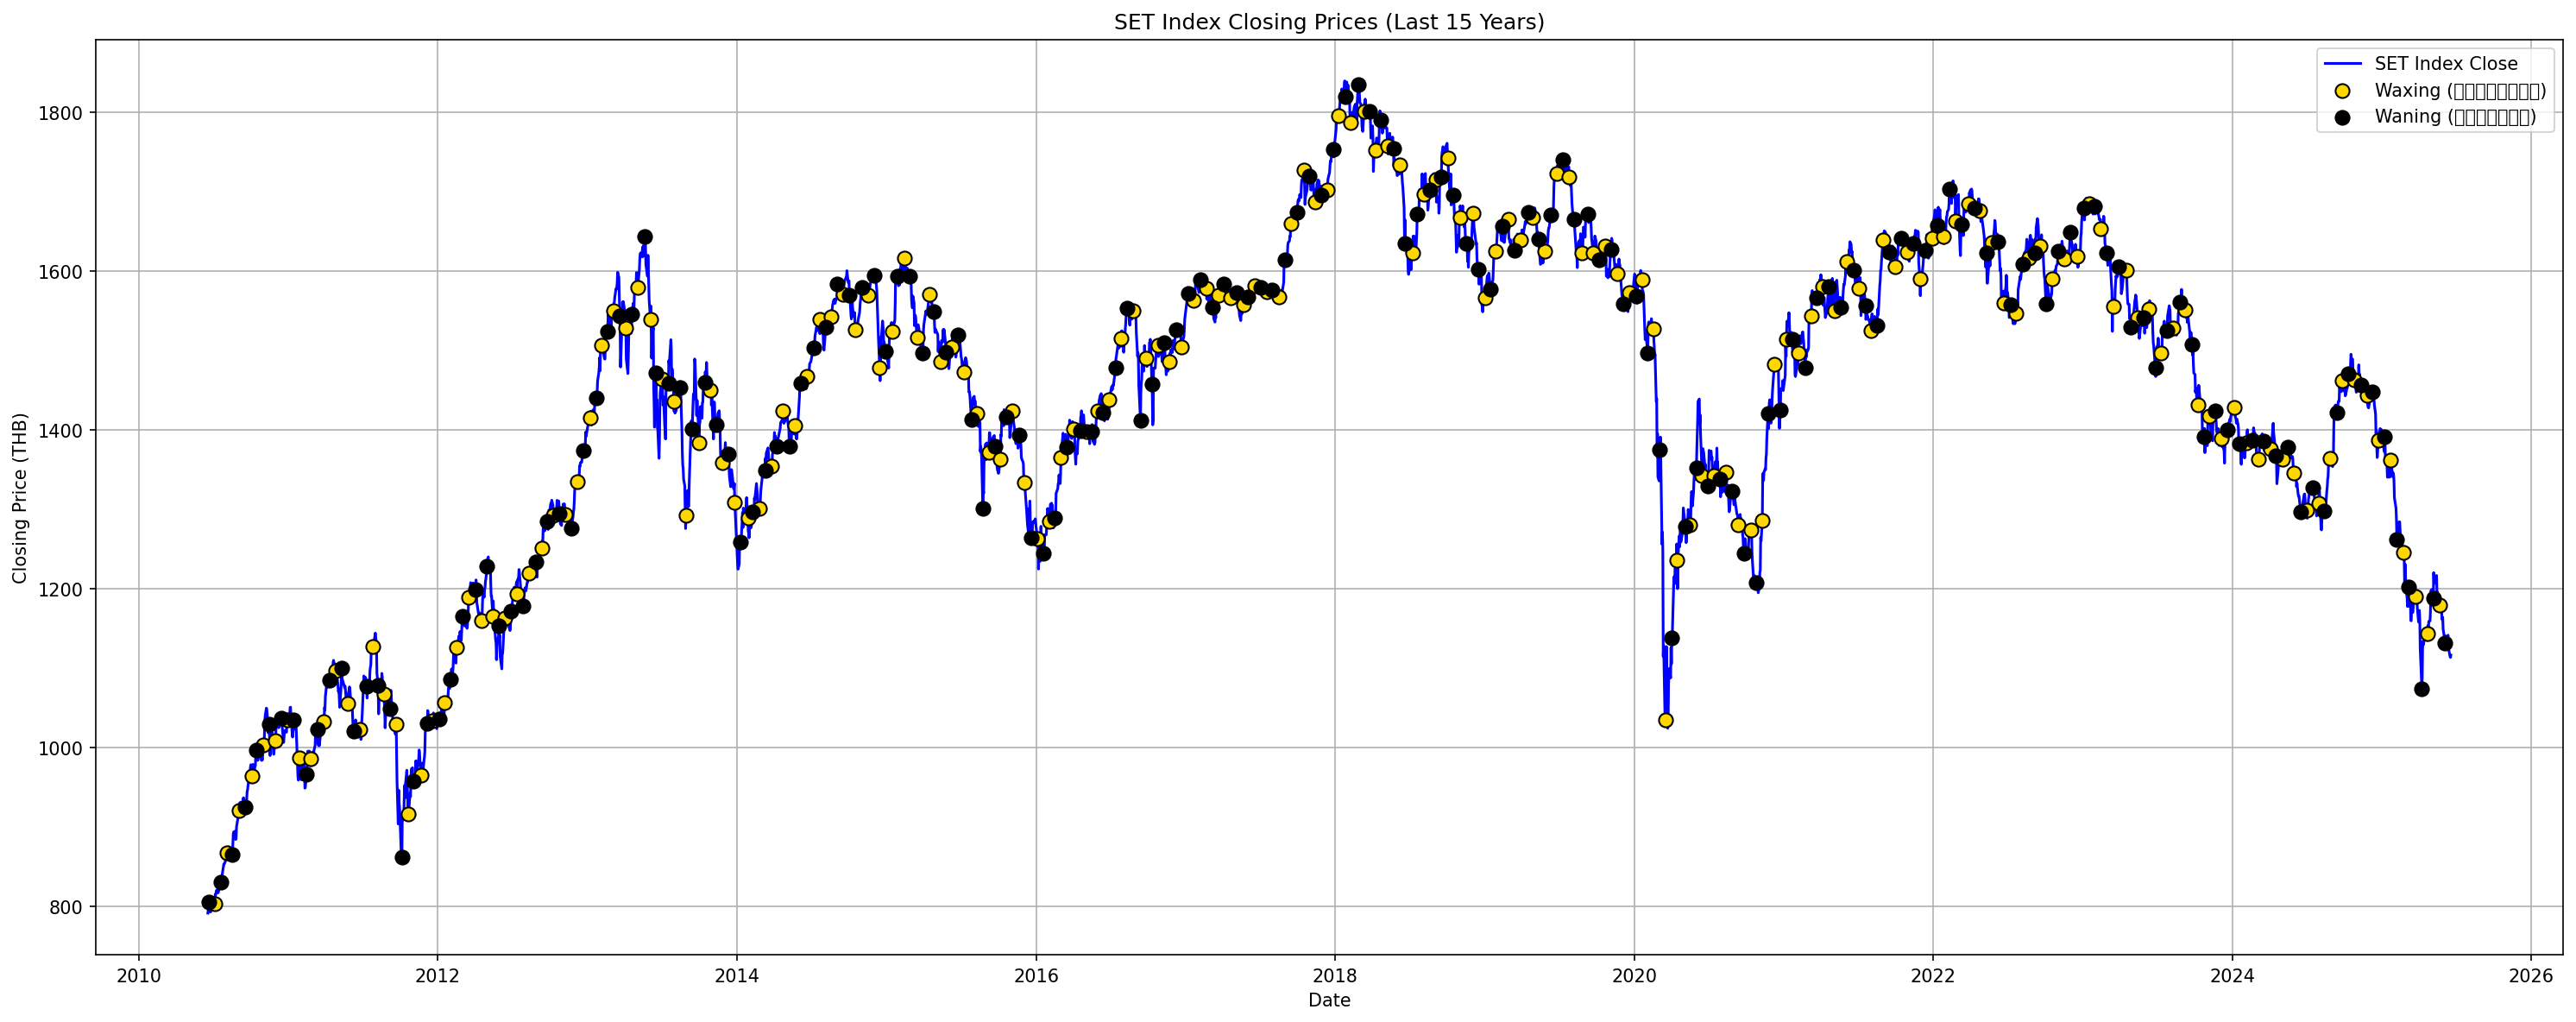

In [212]:
fig, ax = plt.subplots(figsize=(20, 8),dpi = 150)

# Plot เส้นราคาปิด
ax.plot(set_index['Date'], set_index['Close'], label='SET Index Close', color='blue')

# Filter เฉพาะวัน Waxing และ Waning
waxing_dates = set_index[set_index['moon_phase'] == 'Waxing']
waning_dates = set_index[set_index['moon_phase'] == 'Waning']

# วงกลมสีเหลืองสำหรับ Waxing
ax.scatter(waxing_dates['Date'], waxing_dates['Close'], color='gold', label='Waxing (ข้างขึ้น)', marker='o', s=60, edgecolors='black', zorder=5)

# วงกลมสีดำสำหรับ Waning
ax.scatter(waning_dates['Date'], waning_dates['Close'], color='black', label='Waning (ข้างแรม)', marker='o', s=60, zorder=5)

# ปรับค่าต่าง ๆ ของกราฟ
ax.set_title('SET Index Closing Prices (Last 15 Years)')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price (THB)')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

In [213]:
new_df = set_index[(set_index['moon_phase'] == 'Waxing') | (set_index['moon_phase'] == 'Waning')]
new_df

Price,Date,Close,High,Low,Open,Volume,moon_phase
Ticker,,^SET.BK,^SET.BK,^SET.BK,^SET.BK,^SET.BK,
1,2010-06-21,806.070007,807.690002,799.070007,799.489990,3786300,Waning
10,2010-07-05,804.030029,808.299988,803.640015,804.700012,4763200,Waxing
20,2010-07-19,830.400024,834.020020,826.090027,827.039978,7437400,Waning
31,2010-08-04,867.340027,871.400024,865.969971,869.000000,9396100,Waxing
38,2010-08-17,865.780029,865.780029,858.880005,862.179993,8017700,Waning
...,...,...,...,...,...,...,...
3601,2025-04-08,1074.589966,1083.750000,1056.410034,1076.109985,5434400,Waning
3609,2025-04-22,1144.050049,1146.020020,1127.459961,1129.349976,3301000,Waxing
3617,2025-05-06,1187.859985,1201.040039,1187.859985,1200.329956,3853000,Waning


## next we will backtesting

In [214]:
new_df['%_change'] = new_df['Close'].pct_change(1)
new_df

C:\Users\siraw\AppData\Local\Temp\ipykernel_22256\4106729851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['%_change'] = new_df['Close'].pct_change(1)


Price,Date,Close,High,Low,Open,Volume,moon_phase,%_change
Ticker,,^SET.BK,^SET.BK,^SET.BK,^SET.BK,^SET.BK,,
1,2010-06-21,806.070007,807.690002,799.070007,799.489990,3786300,Waning,NaN
10,2010-07-05,804.030029,808.299988,803.640015,804.700012,4763200,Waxing,-0.002531
20,2010-07-19,830.400024,834.020020,826.090027,827.039978,7437400,Waning,0.032797
31,2010-08-04,867.340027,871.400024,865.969971,869.000000,9396100,Waxing,0.044485
38,2010-08-17,865.780029,865.780029,858.880005,862.179993,8017700,Waning,-0.001799
...,...,...,...,...,...,...,...,...
3601,2025-04-08,1074.589966,1083.750000,1056.410034,1076.109985,5434400,Waning,-0.097029
3609,2025-04-22,1144.050049,1146.020020,1127.459961,1129.349976,3301000,Waxing,0.064639
3617,2025-05-06,1187.859985,1201.040039,1187.859985,1200.329956,3853000,Waning,0.038294


In [215]:
# shift to the top 1 lines
new_df['%_change'] = new_df['%_change'].shift(-1)
new_df

C:\Users\siraw\AppData\Local\Temp\ipykernel_22256\3807110890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['%_change'] = new_df['%_change'].shift(-1)


Price,Date,Close,High,Low,Open,Volume,moon_phase,%_change
Ticker,,^SET.BK,^SET.BK,^SET.BK,^SET.BK,^SET.BK,,
1,2010-06-21,806.070007,807.690002,799.070007,799.489990,3786300,Waning,-0.002531
10,2010-07-05,804.030029,808.299988,803.640015,804.700012,4763200,Waxing,0.032797
20,2010-07-19,830.400024,834.020020,826.090027,827.039978,7437400,Waning,0.044485
31,2010-08-04,867.340027,871.400024,865.969971,869.000000,9396100,Waxing,-0.001799
38,2010-08-17,865.780029,865.780029,858.880005,862.179993,8017700,Waning,0.063249
...,...,...,...,...,...,...,...,...
3601,2025-04-08,1074.589966,1083.750000,1056.410034,1076.109985,5434400,Waning,0.064639
3609,2025-04-22,1144.050049,1146.020020,1127.459961,1129.349976,3301000,Waxing,0.038294
3617,2025-05-06,1187.859985,1201.040039,1187.859985,1200.329956,3853000,Waning,-0.006777


In [216]:
def classify_trend(pct_change , threshold= 0):
    if pct_change > threshold:
        return 'Uptrend'
    elif pct_change < -threshold:
        return 'Downtrend'
    else:
        return 'Sideway'

In [217]:
new_df['Trend'] = new_df['%_change'].apply(lambda x: classify_trend(x, threshold=0))
new_df.head(30)

C:\Users\siraw\AppData\Local\Temp\ipykernel_22256\1463187099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Trend'] = new_df['%_change'].apply(lambda x: classify_trend(x, threshold=0))


Price,Date,Close,High,Low,Open,Volume,moon_phase,%_change,Trend
Ticker,,^SET.BK,^SET.BK,^SET.BK,^SET.BK,^SET.BK,,,
1,2010-06-21,806.070007,807.690002,799.070007,799.489990,3786300,Waning,-0.002531,Downtrend
10,2010-07-05,804.030029,808.299988,803.640015,804.700012,4763200,Waxing,0.032797,Uptrend
20,2010-07-19,830.400024,834.020020,826.090027,827.039978,7437400,Waning,0.044485,Uptrend
31,2010-08-04,867.340027,871.400024,865.969971,869.000000,9396100,Waxing,-0.001799,Downtrend
38,2010-08-17,865.780029,865.780029,858.880005,862.179993,8017700,Waning,0.063249,Uptrend
50,2010-09-02,920.539978,928.510010,912.450012,928.070007,9704500,Waxing,0.004639,Uptrend
60,2010-09-16,924.809998,927.539978,920.020020,922.940002,5051900,Waning,0.042614,Uptrend
72,2010-10-04,964.219971,986.750000,963.270020,985.599976,5571600,Waxing,0.034152,Uptrend
81,2010-10-15,997.150024,999.429993,991.380005,994.719971,4176800,Waning,0.006107,Uptrend


# Conclude


In [218]:
def analyze_moon_trend_conditions(df):
    """
    Analyze moon phase and trend conditions in the DataFrame
    
    Conditions:
    1. Waxing AND Uptrend
    2. Waning AND Downtrend
    """
    
    # Handle MultiIndex columns if present
    if isinstance(df.columns, pd.MultiIndex):
        # Flatten MultiIndex columns
        df.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]
    else:
        # Clean column names (remove extra spaces if any)
        df.columns = df.columns.str.strip()
    
    # Find the correct column names (case-insensitive search)
    moon_col = None
    trend_col = None
    
    for col in df.columns:
        if 'moon' in col.lower() and 'phase' in col.lower():
            moon_col = col
        elif 'trend' in col.lower():
            trend_col = col
    
    if moon_col is None or trend_col is None:
        print("Available columns:", list(df.columns))
        raise ValueError("Could not find 'moon_phase' and 'Trend' columns. Please check column names.")
    
    print(f"Using columns: '{moon_col}' and '{trend_col}'")
    
    # Convert to lowercase for case-insensitive comparison
    df['moon_phase_clean'] = df[moon_col].str.lower().str.strip()
    df['trend_clean'] = df[trend_col].str.lower().str.strip()
    
    # Calculate total number of rows
    total_rows = len(df)
    
    # Condition 1: Waxing AND Uptrend
    condition1 = (df['moon_phase_clean'] == 'waxing') & (df['trend_clean'] == 'uptrend')
    count_waxing_uptrend = condition1.sum()
    
    # Condition 2: Waning AND Downtrend
    condition2 = (df['moon_phase_clean'] == 'waning') & (df['trend_clean'] == 'downtrend')
    count_waning_downtrend = condition2.sum()
    
    # Combined conditions
    combined_condition = condition1 | condition2
    count_combined = combined_condition.sum()
    percent_combined = (count_combined / total_rows) * 100
    
    # Print results
    print("=== Moon Phase & Trend Analysis ===")
    print(f"Total records: {total_rows}")
    print()
    print(f"Waxing + Uptrend:")
    print(f"  Count: {count_waxing_uptrend}")
    print()
    print(f"Waning + Downtrend:")
    print(f"  Count: {count_waning_downtrend}")
    print()
    print(f"Combined (Either condition):")
    print(f"  Count: {count_combined}")
    print(f"  Percentage: {percent_combined:.2f}%")
    
    # Return results as dictionary for further use
    results = {
        'total_rows': total_rows,
        'waxing_uptrend_count': count_waxing_uptrend,
        'waning_downtrend_count': count_waning_downtrend,
        'combined_count': count_combined,
        'combined_percent': percent_combined
    }
    
    return results

# Alternative one-liner approach
def quick_analysis(df):
    """Quick one-liner calculations"""
    # Handle MultiIndex columns if present
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]
    
    # Find the correct column names
    moon_col = None
    trend_col = None
    
    for col in df.columns:
        if 'moon' in col.lower() and 'phase' in col.lower():
            moon_col = col
        elif 'trend' in col.lower():
            trend_col = col
    
    if moon_col is None or trend_col is None:
        print("Available columns:", list(df.columns))
        return
    
    total = len(df)
    
    # Clean data
    moon_clean = df[moon_col].str.lower().str.strip()
    trend_clean = df[trend_col].str.lower().str.strip()
    
    # Calculate percentages
    waxing_uptrend_pct = ((moon_clean == 'waxing') & (trend_clean == 'uptrend')).sum() / total * 100
    waning_downtrend_pct = ((moon_clean == 'waning') & (trend_clean == 'downtrend')).sum() / total * 100
    
    print(f"Waxing + Uptrend: {waxing_uptrend_pct:.2f}%")
    print(f"Waning + Downtrend: {waning_downtrend_pct:.2f}%")

# Usage example:
# results = analyze_moon_trend_conditions(df)
# 
# Or for quick analysis:
# quick_analysis(df)

In [219]:
results = analyze_moon_trend_conditions(new_df)

Using columns: 'moon_phase' and 'Trend'
=== Moon Phase & Trend Analysis ===
Total records: 371

Waxing + Uptrend:
  Count: 106

Waning + Downtrend:
  Count: 89

Combined (Either condition):
  Count: 195
  Percentage: 52.56%


C:\Users\siraw\AppData\Local\Temp\ipykernel_22256\2012830.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['moon_phase_clean'] = df[moon_col].str.lower().str.strip()
C:\Users\siraw\AppData\Local\Temp\ipykernel_22256\2012830.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trend_clean'] = df[trend_col].str.lower().str.strip()
